## 7324 Assignment A5 : Logistic Regression vs KMeans
##### Name: Thang Nguyen
##### SMU ID: 48689334

## Imports

In [1]:
# The Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
# Data Wrangling Tool
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Foundational libraries
import pandas as pd
import numpy as np

## Utility Functions

In [2]:
def display_confusion_matrix(title: str, background: str, y_test: list, y_predict: list, classes: list):
    matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_predict, labels=classes), display_labels=classes)
    matrix.plot()
    plt.xlabel('Predicted Label', color=background)
    plt.ylabel('True Label', color=background)
    plt.title(title)
    plt.show()

## Loading Dataset

In [3]:
diabet_df = pd.read_csv("../data/diabetes.csv")
# check for nulls 
diabet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Cleaning Dataset

In [4]:
diabet_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Seems like zeros may be an issue

In [5]:
for col in diabet_df:
    print(f'{col} min: {diabet_df[col].min()}')

Pregnancies min: 0
Glucose min: 0
BloodPressure min: 0
SkinThickness min: 0
Insulin min: 0
BMI min: 0.0
DiabetesPedigreeFunction min: 0.078
Age min: 21
Outcome min: 0


### Dealing With Zeros
#### Zeros may skew the features in a certain direction
#### We apply the mean of the column for any zero

##### Set: Glucose, BloodPressure, SkinThickness, Insulin, BMI

In [6]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    diabet_df[col] = diabet_df[col].replace(to_replace = 0, value = diabet_df[col].mean())

In [7]:
diabet_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


## Analysis

### Splitting and Scaling

In [8]:
# separate features from target
features = diabet_df.drop('Outcome', axis=1)
target = diabet_df['Outcome']

In [9]:
lgr_X = features
lgr_y = target

# split data into training and test sets
lgr_X_train, lgr_X_test, lgr_y_train, lgr_y_test = train_test_split(lgr_X.values, lgr_y.values, random_state = 0, train_size = 0.8)

#### All Features: Logistic Regression

In [10]:
lgr_all = LogisticRegression(random_state=0, solver="newton-cg")

In [11]:
lgr_all.fit(lgr_X_train, lgr_y_train)
lgr_all_y_predict = lgr_all.predict(lgr_X_test)

In [12]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(lgr_y_test, lgr_all_y_predict))
print(classification_report(lgr_y_test, lgr_all_y_predict))
print(confusion_matrix(lgr_y_test, lgr_all_y_predict))

0.8181818181818182
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

[[98  9]
 [19 28]]


##### Confusion Matrix

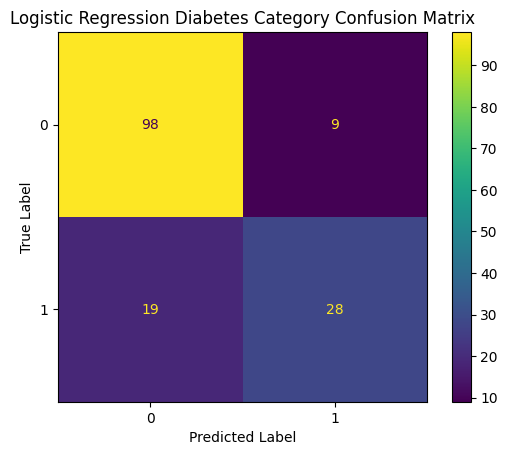

In [22]:
display_confusion_matrix('Logistic Regression Diabetes Category Confusion Matrix', 'black', lgr_y_test, lgr_all_y_predict, lgr_all.classes_)

#### All Features w/Scaling: Logistic Regression

In [13]:
# scale features
scaler = StandardScaler()
lgr_X_train_scaled = scaler.fit_transform(lgr_X_train)
lgr_X_test_scaled = scaler.fit_transform(lgr_X_test)

In [14]:
lgr_all_scaled = LogisticRegression(random_state=0, solver="newton-cg")

In [15]:
lgr_all_scaled.fit(lgr_X_train_scaled, lgr_y_train)
lgr_all_scaled_y_predict = lgr_all.predict(lgr_X_test_scaled)

In [16]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(lgr_y_test, lgr_all_scaled_y_predict))
print(classification_report(lgr_y_test, lgr_all_scaled_y_predict, zero_division=True))
print(confusion_matrix(lgr_y_test, lgr_all_scaled_y_predict))

0.6948051948051948
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       107
           1       0.00      0.00      0.00        47

    accuracy                           0.69       154
   macro avg       0.35      0.50      0.41       154
weighted avg       0.48      0.69      0.57       154

[[107   0]
 [ 47   0]]


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
